In [1]:
from sklearn.linear_model import Ridge

In [3]:
from sklearn.model_selection import GridSearchCV

#ridge regression is used to remove overfittiing cases from linear models
#here we have a hyperparameter aplha or labda
#to select perfect hyper parameter we use grid search cv

In [6]:
ridge_regressior=Ridge()

In [7]:
ridge_regressior

Ridge()

In [8]:
from sklearn.datasets import fetch_california_housing

In [14]:
housing=fetch_california_housing()

In [10]:
import pandas as pd
import numpy as np

In [15]:
pd.DataFrame(housing.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
dataset=pd.DataFrame(housing.data)

In [18]:
dataset.columns=housing.feature_names

In [19]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [20]:
x=dataset
y=housing.target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

In [24]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)


In [30]:
X_test=scaler.transform(X_test)

In [34]:
#let say we have some alpha parameter values, then we have to select the best out of them
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,8,90]}
ridgecv=GridSearchCV(ridge_regressior,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 8, 90]},
             scoring='neg_mean_squared_error')

In [36]:
print(ridgecv.best_params_)

{'alpha': 8}


In [39]:
print(ridgecv.best_score_)

-0.5268179681302122


In [40]:
ridgecv.predict(X_test)

array([75.18349211, 77.46869246, 81.71717061, ..., 74.6808524 ,
       72.11846466, 74.94152816])

In [41]:
ridge_predict=ridgecv.predict(X_test)

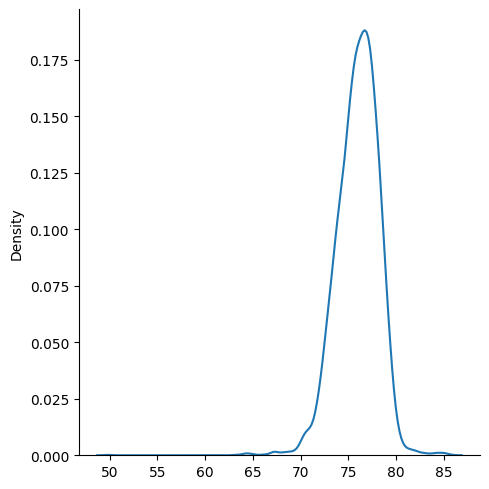

In [43]:
import seaborn as sns
sns.displot(ridge_predict-y_test,kind='kde')

In [48]:
from sklearn.metrics import r2_score
score=r2_score(ridge_predict,y_test)

In [49]:
score

-826.4785193005607